## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [45]:
# Changed here
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_117610/4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 516s 8s/step - loss: 1.2947 - accuracy: 0.8242 - val_loss: 1.2647 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 680s 11s/step - loss: 0.4870 - accuracy: 0.9318 - val_loss: 0.0430 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 513s 8s/step - loss: 0.3774 - accuracy: 0.9364 - val_loss: 0.5379 - val_accuracy: 0.9444
Epoch 4/20
61/61 [==============================] - 485s 8s/step - loss: 0.4595 - accuracy: 0.9441 - val_loss: 0.1533 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 475s 8s/step - loss: 0.3233 - accuracy: 0.9549 - val_loss: 1.0618e-04 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 469s 8s/step - loss: 0.3885 - accuracy: 0.9580 - val_loss: 6.2790e-04 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 477s 8s/step - loss: 0.3035 - accuracy: 0.9636 - val_loss: 2.8573e-04 - val_accuracy: 1.0000


In [17]:
import matplotlib.pyplot as plt

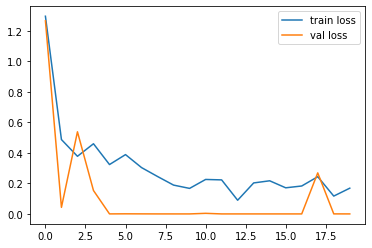

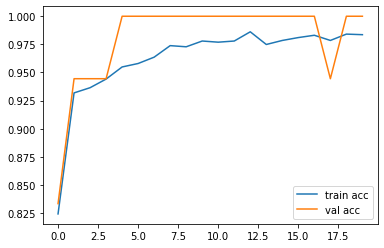

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [20]:

y_pred = model.predict(test_set)


In [21]:
y_pred

array([[6.09244823e-20, 7.46555173e-08, 1.50178636e-28, 9.99999881e-01],
       [0.00000000e+00, 1.00000000e+00, 1.32446168e-37, 3.58437574e-38],
       [6.53916130e-20, 1.00000000e+00, 1.01582957e-29, 1.97371573e-27],
       [0.00000000e+00, 3.89168703e-19, 4.09662976e-21, 1.00000000e+00],
       [2.71019456e-08, 0.00000000e+00, 1.00000000e+00, 3.26322286e-32],
       [0.00000000e+00, 2.55966352e-24, 1.00000000e+00, 0.00000000e+00],
       [1.60283515e-17, 1.16750836e-17, 1.00000000e+00, 5.88098910e-22],
       [1.00000000e+00, 4.09475697e-20, 8.95554295e-29, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.31404037e-04, 2.04619404e-29, 9.99668598e-01, 2.77958780e-27],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36240629e-25, 1.17944464e-21, 9.11978035e-22, 1.00000000e+00],
       [1.38364333e-08, 7.37785541e-35, 1.00000000e+00, 1.01675878e-24],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([3, 1, 1, 3, 2, 2, 2, 0, 0, 2, 1, 3, 2, 1, 3, 0, 1, 3])

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet152V2.h5')

In [27]:
img_data

NameError: name 'img_data' is not defined

In [28]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/Test/Coffee/download (2).jpg'

In [12]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [13]:
x.shape

(224, 224, 3)

In [14]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.8.0'